## Sales Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the dataset

In [3]:
df = pd.read_csv('/Users/strou/OneDrive - LUT University/Sales Data.csv')

2. Ensure correct data types

In [5]:
 df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Hour'] = df['Order Date'].dt.hour
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

3. Total number of sales

In [7]:
total_sales = df['Quantity Ordered'].sum()
print(f"Total number of sales: {total_sales}")

Total number of sales: 209079


4. Average sales per month

In [9]:
monthly_sales = df.groupby('Month')['Sales'].sum()
avg_sales_per_month = monthly_sales.mean()
print(f"Average monthly sales: {avg_sales_per_month:.2f}")

Average monthly sales: 2874336.33


5. Monthly revenue

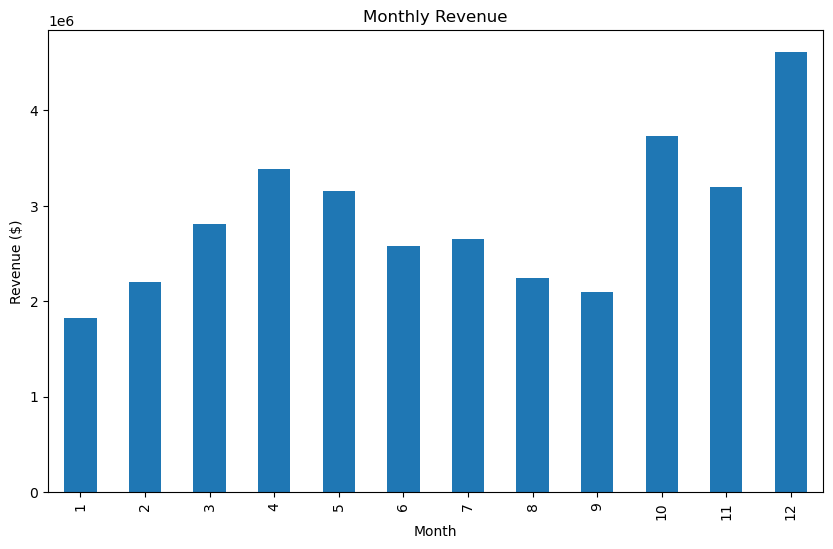

In [11]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.show()

6. Key demographics (City-based)

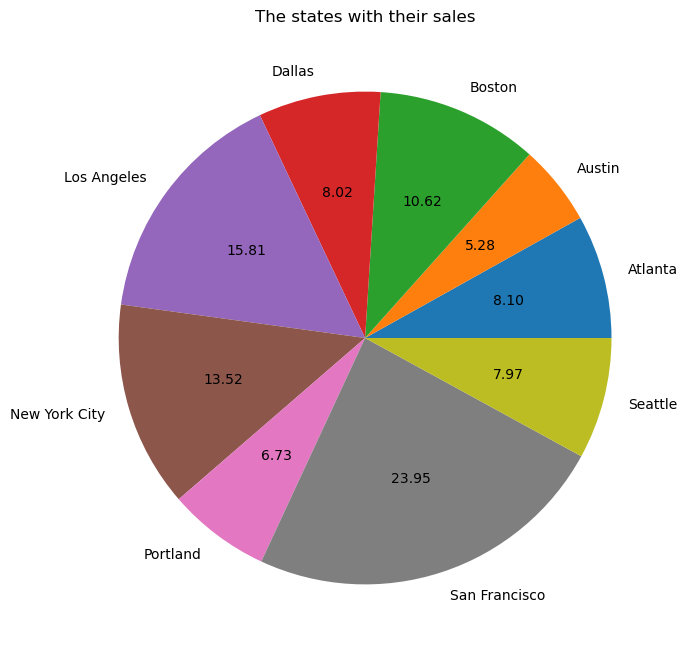

In [13]:
city_sales = df.groupby('City')['Sales'].sum()

plt.figure(figsize = (8,8))
plt.title('The states with their sales')
plt.pie(city_sales,autopct = '%.2f',labels = city_sales.index)
plt.show()

7. Market with highest average sales

In [15]:
avg_sales_city = df.groupby('City')['Sales'].mean().sort_values(ascending=False)
print("Market (City) with highest average sales:")
print(avg_sales_city.head(1))

Market (City) with highest average sales:
City
Atlanta    187.856903
Name: Sales, dtype: float64


8. Profits by product segment (assuming segment available, if not, group by Product)

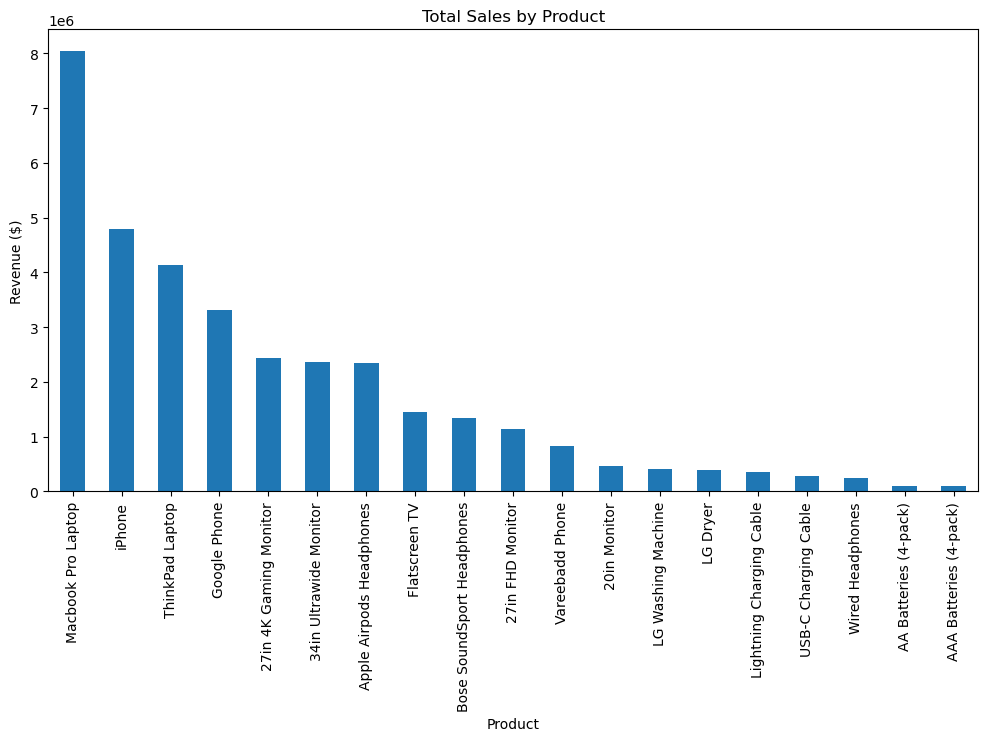

In [17]:
segment_profit = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
segment_profit.plot(kind='bar')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=90)
plt.show()


9. Best and worst selling periods

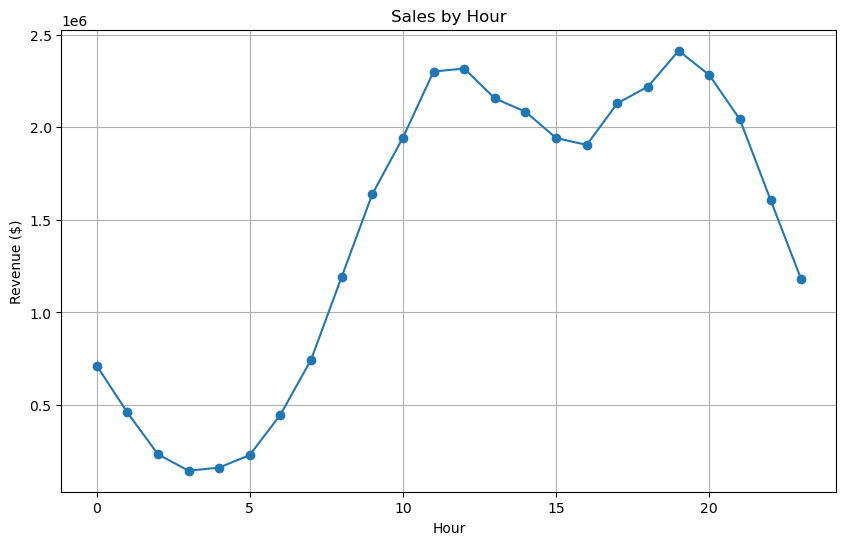

In [19]:
# 
hourly_sales = df.groupby('Hour')['Sales'].sum()
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', marker='o')
plt.title('Sales by Hour')
plt.xlabel('Hour')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()

10. Best selling products

In [21]:
best_sellers = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
print("Top 5 Best Selling Products:")
print(best_sellers.head())

Top 5 Best Selling Products:
Product
AAA Batteries (4-pack)      31017
AA Batteries (4-pack)       27635
USB-C Charging Cable        23975
Lightning Charging Cable    23217
Wired Headphones            20557
Name: Quantity Ordered, dtype: int64


11. Recommendations: What to order more or less of

In [23]:
print("Products to order more of (high sales volume):")
print(best_sellers.head())
print("Products to order less of (low sales volume):")
print(best_sellers.tail())

Products to order more of (high sales volume):
Product
AAA Batteries (4-pack)      31017
AA Batteries (4-pack)       27635
USB-C Charging Cable        23975
Lightning Charging Cable    23217
Wired Headphones            20557
Name: Quantity Ordered, dtype: int64
Products to order less of (low sales volume):
Product
ThinkPad Laptop       4130
20in Monitor          4129
Vareebadd Phone       2068
LG Washing Machine     666
LG Dryer               646
Name: Quantity Ordered, dtype: int64
